# 1. TASK ONE:DATA PROCESSING
    before applying AI algorithms, data often needs to be preprocessed to
    ensure its quality and suitability for analysis. This task involves cleaning,
    transforming, and preparing raw data for AI model training.

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578 

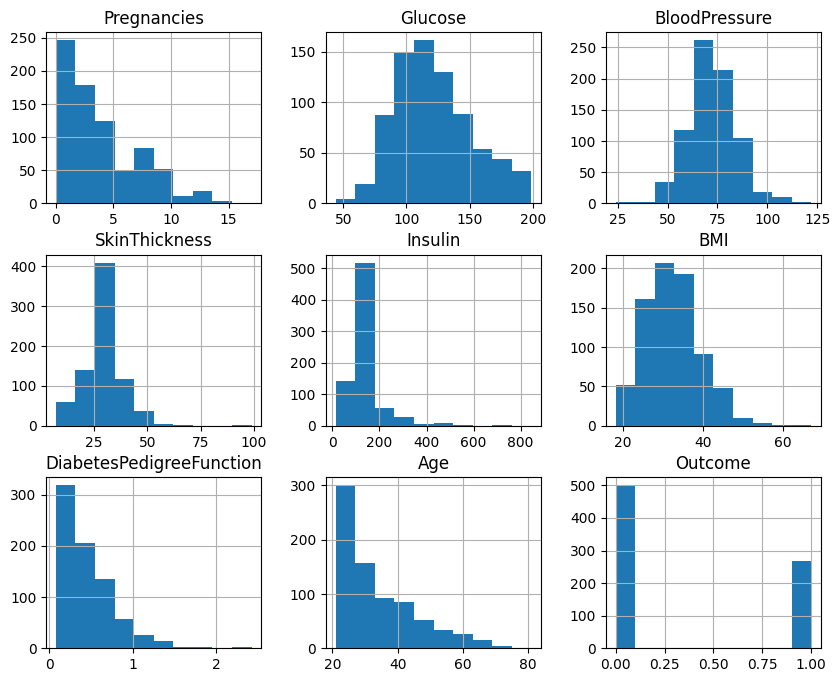


Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Processed Data (First 5 rows of X_train):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.844885 -0.877389      -1.026200      -1.269567 -1.148089 -1.245506   
1     0.342981 -0.548616      -0.033518      -0.017463  1.994354  0.646594   
2    -1.141852  0.437703      -0.364412       1.462295  1.111645  1.432543   
3     0.046014  0.306194      -0.364412      -0.928084  0.123012  0.093519   
4    -0.844885 -0.614370      -3.507904       1.006985 -0.853853  1.578089   

   DiabetesPedigreeFunction       Age  
0                 -0.639892 -0.956462  
1                 -0.944924 -0.445935  
2                 -0.322779 -0.786286  
3          

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv('diabetes.csv')
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


# Step 2: Exploratory Data Analysis (EDA)
# Display first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values Count (0 may indicate missing data):")
print(data.isnull().sum())

# Visualizing the data distribution for each feature
data.hist(figsize=(10, 8))
plt.show()

# Step 3: Handling Missing Values
# Replace 0 values with NaN for Glucose, BloodPressure, SkinThickness, Insulin, BMI as they shouldn't be 0
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Fill missing values with column mean
data.fillna(data.mean(), inplace=True)

# Verifying that there are no missing values left
print("\nMissing Values After Imputation:")
print(data.isnull().sum())

# Step 4: Data Transformation (Scaling)
# Separating features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardizing the feature variables (X) using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Final processed data ready for AI model training
print("\nProcessed Data (First 5 rows of X_train):")
print(pd.DataFrame(X_train, columns=columns[:-1]).head())

print("\nTraining and testing data prepared successfully!")
